# Police Car Crash Dataset Task
### Dillon O'Rourke (26/02/2024)

The objective of this project is to build a machine learning model to predict whether a police officer is likely to attend a road collision accident. The dataset contains locational, temporal, environmental data as well as data about the officers that did or did not attend the scene of the accident.

A "train_data.csv" dataset will be used to train and test machine learning models. Once a model is chosen, it will be used to predict the probability that an officer will attend an accident in the "test_data.csv" dataset.

______________________________________________________________________________________________________

## Methodology

### 1. Exploratory Data Analysis.
* 1.1 Exploring the data's structure, and features
* 1.2 Outlier Analysis
* 1.3 Handling and aggregating temporal data (preprocessing required for EDA) & Exploring distributions
* 1.4 `LSOA_of_Accident_Location` column data structure
* 1.5 `Local_Authority_(Highway)` column data structure
* 1.6 Correlation Analysis
### 2. Data Preprocessing.
* 2.1 Handling `LSOA_of_Accident_Location` and `Local_Authority_(Highway)`
* 2.2 Converting police attendance to binary
* 2.3 Handling NULL/Missing data
    * `Time` and `LSOA_of_Accident_Location` missing data
### 3. Model Selection & Experimentation.
* 3.1 Creating our feature and target variables and splitting the data into test and train data.
* 3.2 Checking Police Officer Attendance in entire train_data.csv dataset
* 3.3 SGD Classifier
* 3.4 Model 2: HistGradientBoostingClassifier
* 3.5 Model 2: HistGradientBoostingClassifier
* 3.6 Model 4: RandomForestClassifier (RFC)
### 4. Feature Engineering & Model Parameter Tuning
* 4.1 Notes on Model Performance while varying features
* 4.2 SGDClassifier v2
* 4.3 HistGradientBoostingClassifier v2
* 4.4 GradientBoostingClassifier v2
* 4.5 RandomForestClassifier v2
* 4.6 K-Fold Cross Validtion Scores
* 4.7 Class Balancing
* 4.8 Random Search Cross Validation Hyper Parameter Tuning of Random Forest Classifier
### 5. Running Final Model on Test Data
* 5.1 Comparing Target Variable Distribution vs Actual Data 
### 6. Time & Compute Constraints Discussion
### 7. Discussion of Model Deployment
______________________________________________________________________________________________________

## 1. Exploratory Data Analysis.

In [15]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

Loading the train and test datasets.

In [16]:
#Importing our datasets which are already split into test and train data
train_data = pd.read_csv('C:/Users/Dillon/Documents/Work (FB)/Vodafone/Task/train_data.csv')

crash_train = train_data

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\1893759791.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/Dillon/Documents/Work (FB)/Vodafone/Task/train_data.csv')


### 1.1 Exploring the data's structure, and features 

In [17]:
crash_train.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201301BS70003,527060,177970,-0.171402,51.486361,1,2,2,1,02/01/2013,...,0,0,1,1,1,0,0,1,1,E01002844
1,201301BS70005,526900,178940,-0.173356,51.495115,1,3,1,2,04/01/2013,...,0,5,1,8,1,0,0,1,1,E01002821
2,201301BS70006,524240,181460,-0.210767,51.518353,1,3,1,1,07/01/2013,...,0,1,1,1,1,0,0,1,1,E01002878
3,201301BS70007,524320,181290,-0.209675,51.516808,1,3,2,1,10/01/2013,...,0,5,1,1,1,0,0,1,1,E01002831
4,201301BS70009,525450,178660,-0.194332,51.492922,1,3,2,1,04/01/2013,...,0,0,4,1,1,0,0,1,1,E01002851


In [18]:
print("Length, Width of train_data:", crash_train.shape)

Length, Width of train_data: (138660, 32)


We have roughly 139k rows and 32 columns in our dataset.

It looks like `Accident_Index` may be our unique identifier for car accidents so let's check for duplicate values in that column;

In [19]:
# This will return true if there are no duplicate values in the column Accident_Index
crash_train['Accident_Index'].is_unique

True

Now let's check for duplicate values in the rest of the columns;

In [20]:
# Checking for NULL Values
null_counts = crash_train.isnull().sum()

print(null_counts)

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              8
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

There are 8 NULL/NaN values in the `Time` column and 9764 in the `LSOA_of_Accident_Location` column. Considering that there are 130k+ rows this is not worrying however I want to investigate what the `LSOA_of_Accident_Location` column is exactly as the acronym is not intuitive.

After doing a quick google search I found that "Lower Layer Super Output Areas (LSOA) are a geographic hierarchy designed to improve the reporting of small area statistics in England and Wales." After checking a ranbom LSOA code I found it is indeed a locational code for an area in England.

With `LSOA_of_Accident_Location`, `Location_Easting_OSGR`, `Location_Northing_OSGR`, `Lattitude` and `Longitude` we have 3 ways to specify locational data related to each accident, none of which contain missing values. These are likely to all be Predictor variables but one may be more suitable than others. Understanding the granularity of each method will prbably be helpful;
 - After reading up on LSOA codes, they are a grouping of OAs which are a grouping of postcodes. 
 - We know that lat, long and OSGR easting and northing will you give you a precise point on a map. 
 - This info may come in helpful later while considering how our models may handle areas vs points differently. It also means that there is no need for both lat, long and OSGR coords as they will give us the same thing.

Regarding the missing values in the LSOA column, I would guess that given my research on LSOA, for some of these accidents, if they occurred in very rural areas, there may be no LSOA to assign since they're based on clusters of postcodes.

In [21]:
# Looking at datatypes in our dataset.
crash_train.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

**String Data**: LSOA_of_Accident_Location, Local_Authority_(Highway), Date, Accident_Index

**Float Data**: Latitude, Longitude

**Integer Data**: Everything else.
 
In terms of temporal data we have;
* **Date**: Our crash data spans all of 2013 but 2013 only. I can't see how this will be helpful while training and testing on 2013 data. Access to more years of data would be beneficial because there is likely to be a seasonal trend.
* **Times**: These are in string format `HH:MM`
* **Day of the week**: Numerical 1-7 values for Monday-Sunday.

We have data for the follwoing Site/Environmental conditions;
* Pedestrian_Crossing-Human_Control
* Pedestrian_Crossing-Physical_Facilities
* Light_Conditions
* Weather_Conditions
* Road_Surface_Conditions 
* Special_Conditions_at_Site    
* Carriageway_Hazards
* Urban_or_Rural_Area

They are all integer values so there's no use in speculating on these, the naming conventions are at least intuitive.

### 1.2 Outlier Analysis

The most important columns to look at for outlier analysis are `Number_of_Vehicles`, `Number_of_Casualties` and `Accident_Severity`.

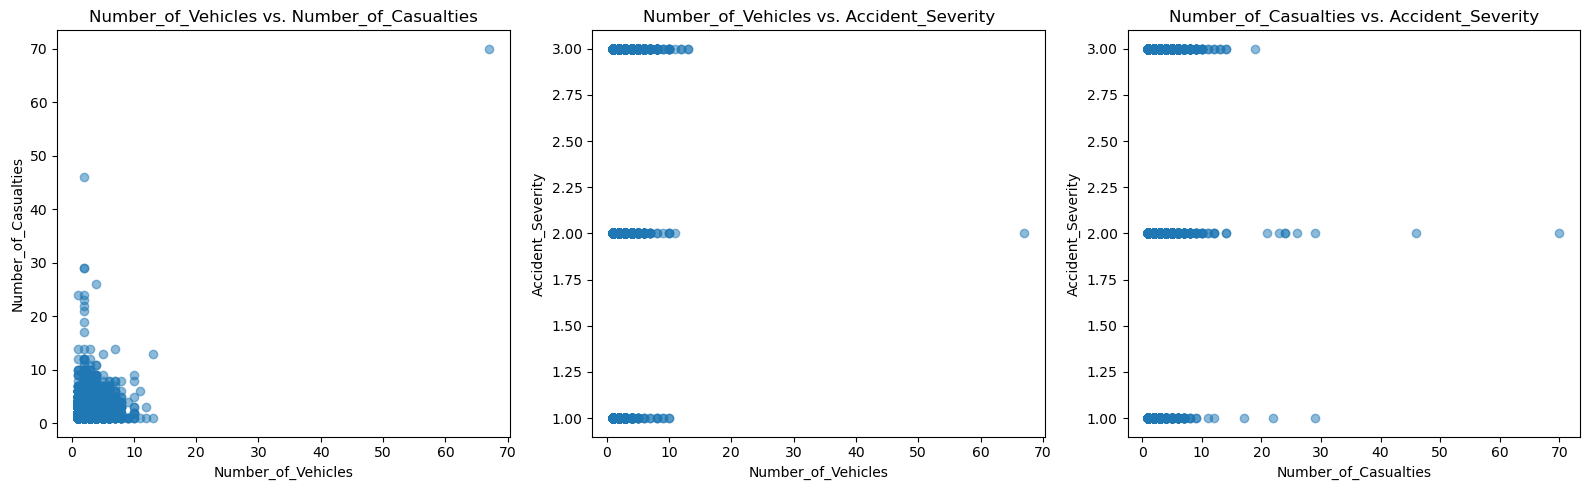

In [22]:
# Plot scatter plots for each pair of selected variables
plt.figure(figsize=(16, 5))  # Adjust figsize as needed

# Scatter plot for Number_of_Vehicles vs. Number_of_Casualties
plt.subplot(1, 3, 1)
plt.scatter(crash_train['Number_of_Vehicles'], crash_train['Number_of_Casualties'], alpha=0.5)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Number_of_Casualties')
plt.title('Number_of_Vehicles vs. Number_of_Casualties')

# Scatter plot for Number_of_Vehicles vs. Accident_Severity
plt.subplot(1, 3, 2)
plt.scatter(crash_train['Number_of_Vehicles'], crash_train['Accident_Severity'], alpha=0.5)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Accident_Severity')
plt.title('Number_of_Vehicles vs. Accident_Severity')

# Scatter plot for Number_of_Casualties vs. Accident_Severity
plt.subplot(1, 3, 3)
plt.scatter(crash_train['Number_of_Casualties'], crash_train['Accident_Severity'], alpha=0.5)
plt.xlabel('Number_of_Casualties')
plt.ylabel('Accident_Severity')
plt.title('Number_of_Casualties vs. Accident_Severity')

plt.tight_layout()

We can see very obvious outliers for a crash with around 70 vehicles and another crash with casualties above 30. I think it woud be important to exclude these. I dont think theres a need for anything more complex like interquartile ranges or standard deviations.

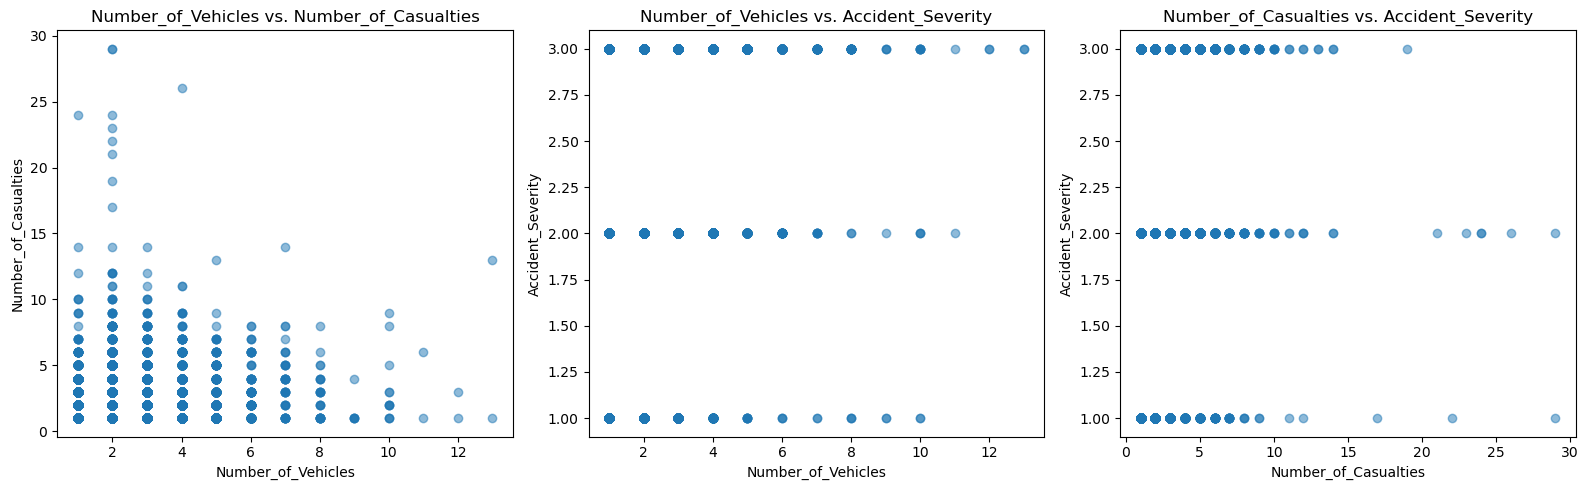

In [23]:
# Filter the DataFrame to exclude data points where Number_of_Vehicles > 25
crash_train = crash_train[crash_train['Number_of_Vehicles'] <= 25]
crash_train = crash_train[crash_train['Number_of_Casualties'] <= 30]

# Plot scatter plots for each pair of selected variables
plt.figure(figsize=(16, 5))  # Adjust figsize as needed

# Scatter plot for Number_of_Vehicles vs. Number_of_Casualties
plt.subplot(1, 3, 1)
plt.scatter(crash_train['Number_of_Vehicles'], crash_train['Number_of_Casualties'], alpha=0.5)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Number_of_Casualties')
plt.title('Number_of_Vehicles vs. Number_of_Casualties')

# Scatter plot for Number_of_Vehicles vs. Accident_Severity
plt.subplot(1, 3, 2)
plt.scatter(crash_train['Number_of_Vehicles'], crash_train['Accident_Severity'], alpha=0.5)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Accident_Severity')
plt.title('Number_of_Vehicles vs. Accident_Severity')

# Scatter plot for Number_of_Casualties vs. Accident_Severity
plt.subplot(1, 3, 3)
plt.scatter(crash_train['Number_of_Casualties'], crash_train['Accident_Severity'], alpha=0.5)
plt.xlabel('Number_of_Casualties')
plt.ylabel('Accident_Severity')
plt.title('Number_of_Casualties vs. Accident_Severity')

plt.tight_layout()

### 1.3 Exploring distributions

In [24]:
#Converting Date dtype to pd.datetime
crash_train['Date'] = pd.to_datetime(crash_train['Date'])

# Looking at datatypes in our dataset.
crash_train.dtypes

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\2493693789.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  crash_train['Date'] = pd.to_datetime(crash_train['Date'])


Accident_Index                                         object
Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                           datetime64[ns]
Day_of_Week                                             int64
Time                                                   object
Local_Authority_(District)                              int64
Local_Authority_(Highway)                              object
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Typ

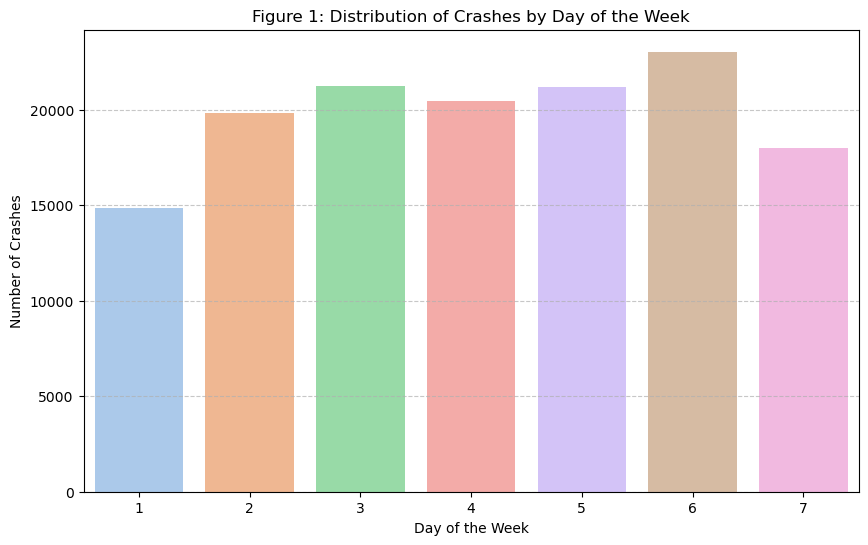

In [25]:
# Plotting the distribution of crashes over days of the week.
plt.figure(figsize=(10, 6))
sns.countplot(data=crash_train, x='Day_of_Week', palette='pastel')
plt.title('Figure 1: Distribution of Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

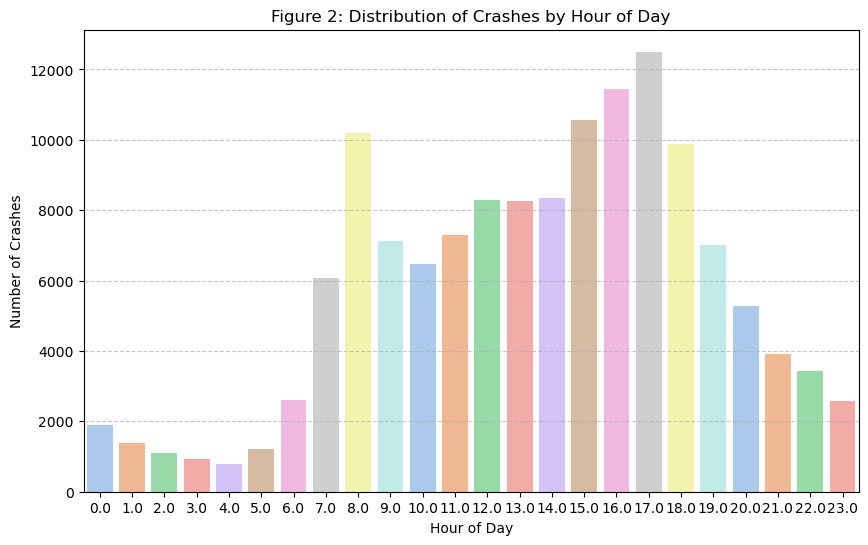

In [26]:
# I want to use the time to see the distribution of crashes throught the day. I only care which hour it
# Falls in so this will be easy  to do.
crash_train['Hour'] = pd.to_datetime(crash_train['Time']).dt.hour

# Plotting the distribution of crashes for time of day.
plt.figure(figsize=(10, 6))
sns.countplot(data=crash_train, x='Hour', palette='pastel')
plt.title('Figure 2: Distribution of Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

This is exactly what I would expect to see. Peaks around rush hour and troughs during the night.

Though now that I have these first two plots, I'm curious what figure 2 would look like on a weekend day.

C:\Users\Dillon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Figure 3: Distribution of Crashes by Hour of Day for Each Day of the Week')

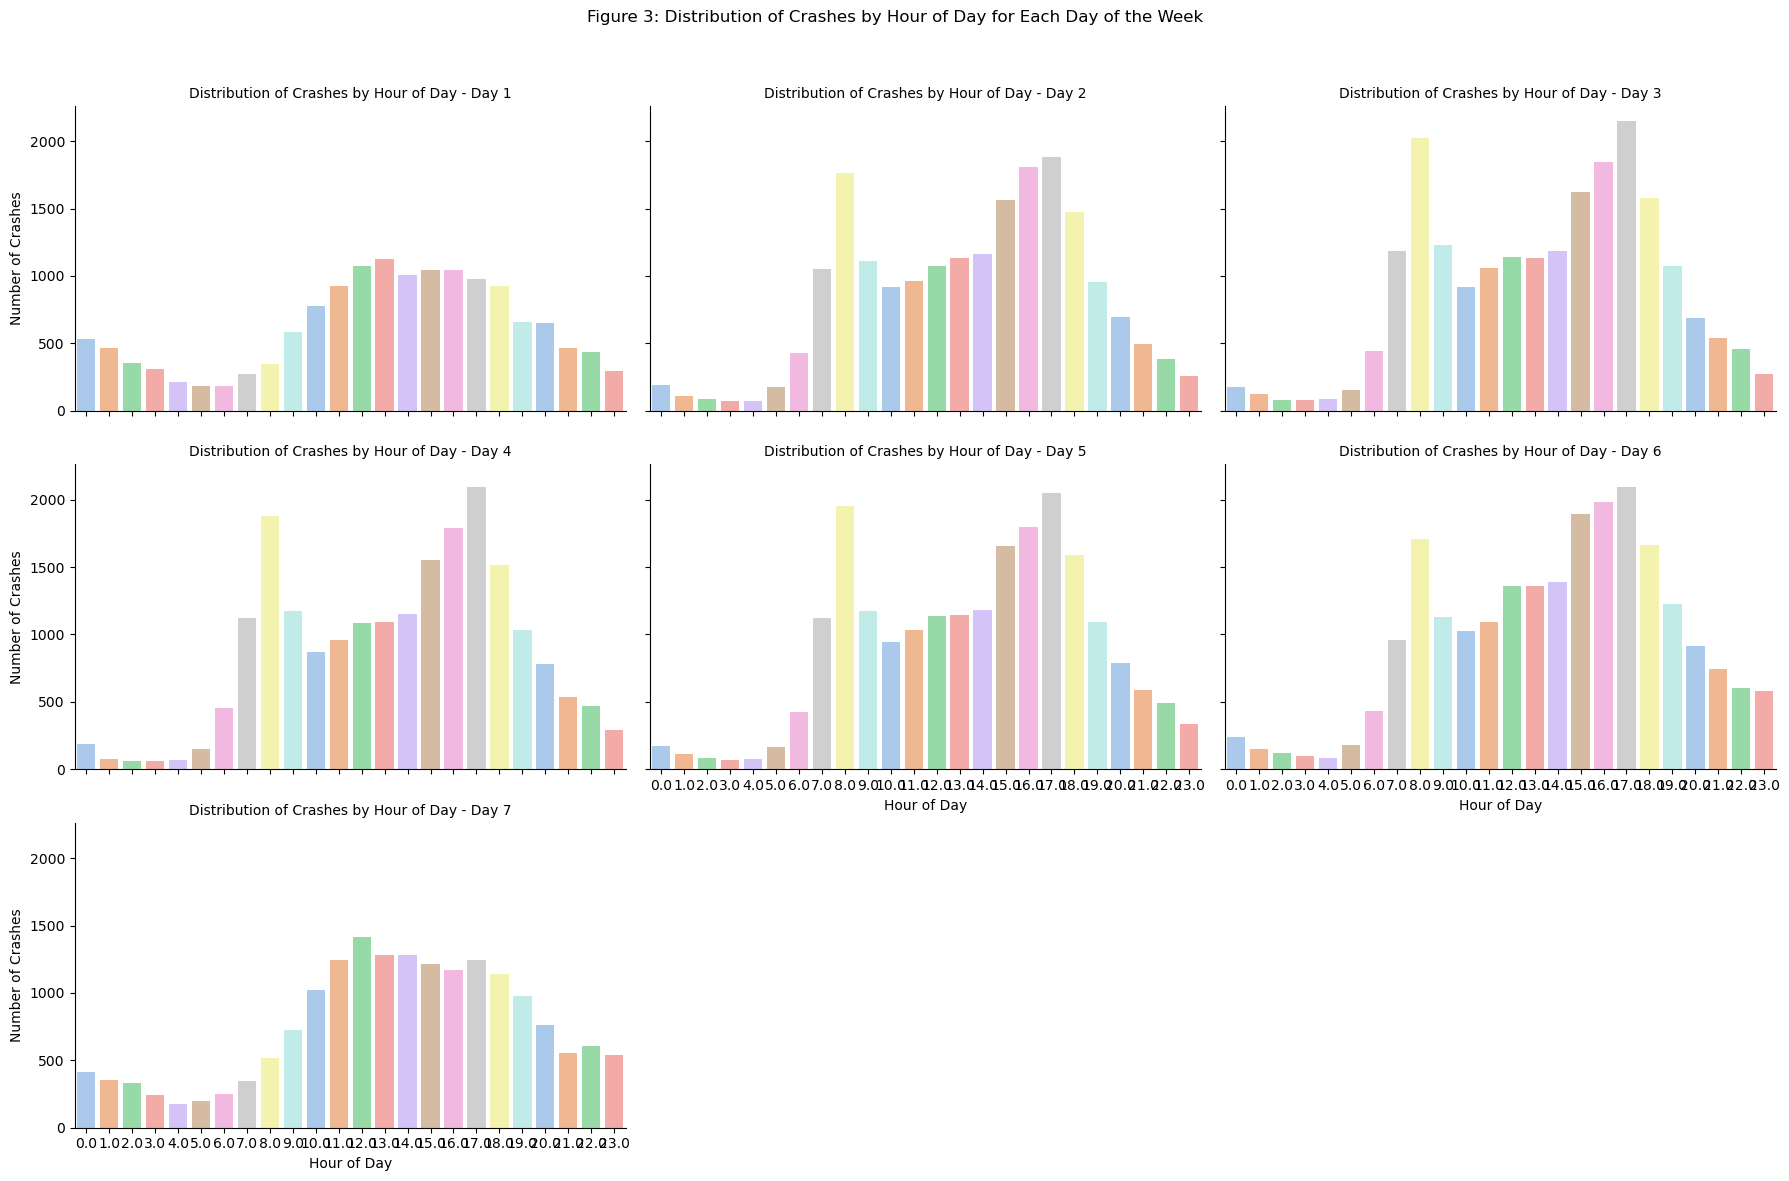

In [27]:
# Create a FacetGrid with each day of the week as a separate plot
g = sns.FacetGrid(crash_train, col='Day_of_Week', col_wrap=3, height=4, aspect=1.5)

# Map countplot to each facet
g.map(sns.countplot, 'Hour', palette='pastel')

# Set titles and labels
g.set_titles('Distribution of Crashes by Hour of Day - Day {col_name}')
g.set_xlabels('Hour of Day')
g.set_ylabels('Number of Crashes')

# Adjust spacing between plots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Figure 3: Distribution of Crashes by Hour of Day for Each Day of the Week')

I think, based on this, day 1 and 7 are our weekends because there are no clear rush hour spikes. What's interesting and what I suppose does make sense is the fact that the number of crashed is higher in the night time on weekends.

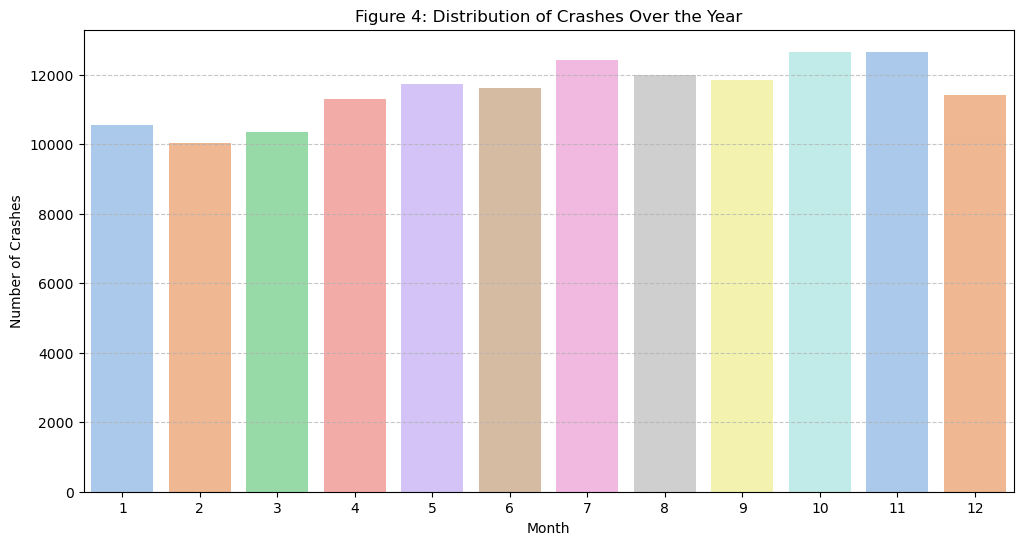

In [28]:
# Extract year and month from the 'Date' column
crash_train['Year'] = crash_train['Date'].dt.year
crash_train['Month'] = crash_train['Date'].dt.month

# Plotting the distribution of crashes over the year
plt.figure(figsize=(12, 6))
sns.countplot(data=crash_train, x='Month', palette='pastel')
plt.title('Figure 4: Distribution of Crashes Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

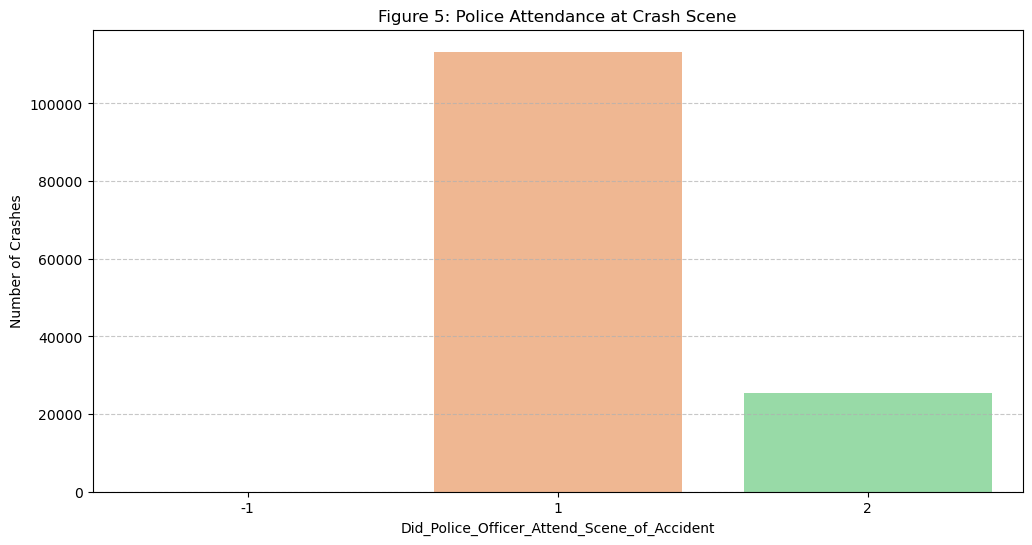

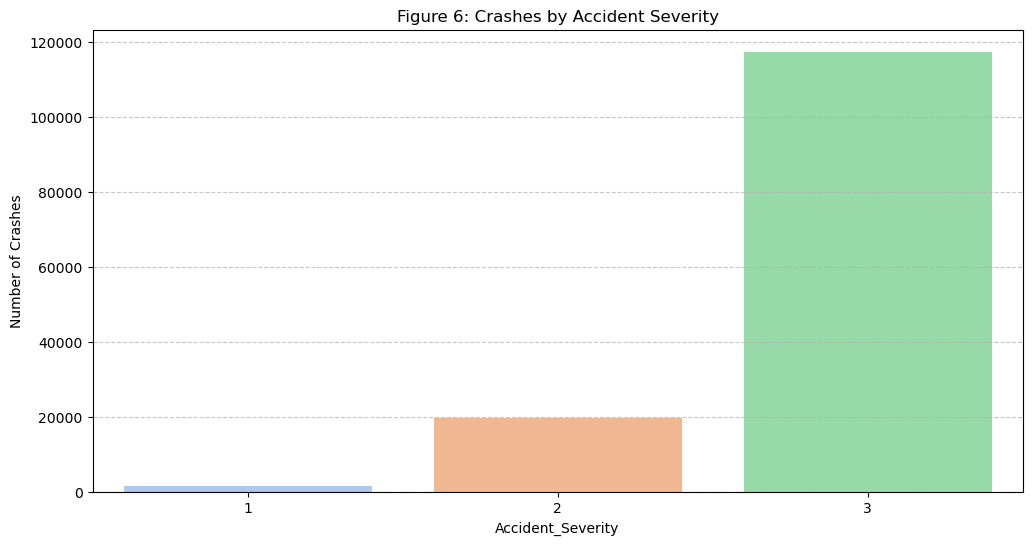

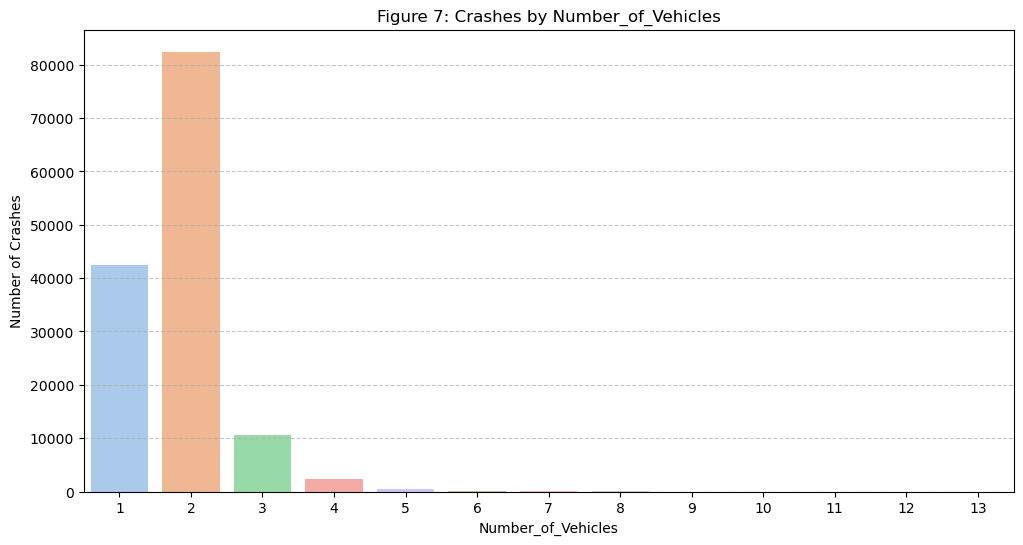

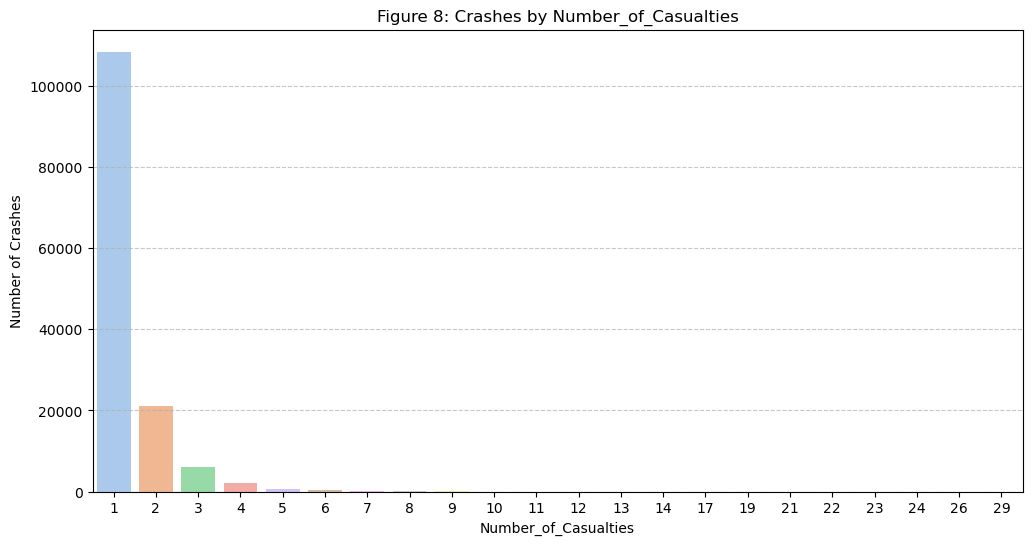

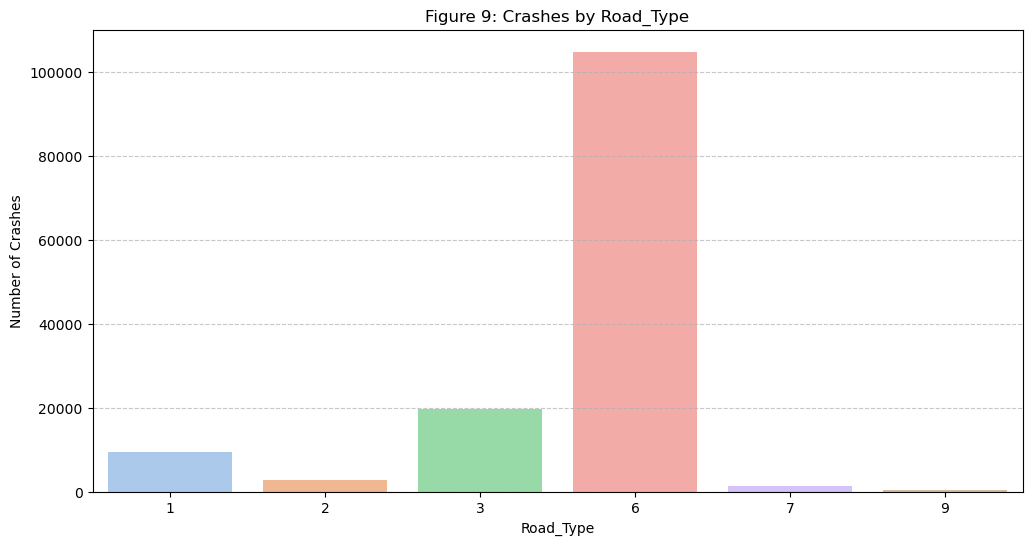

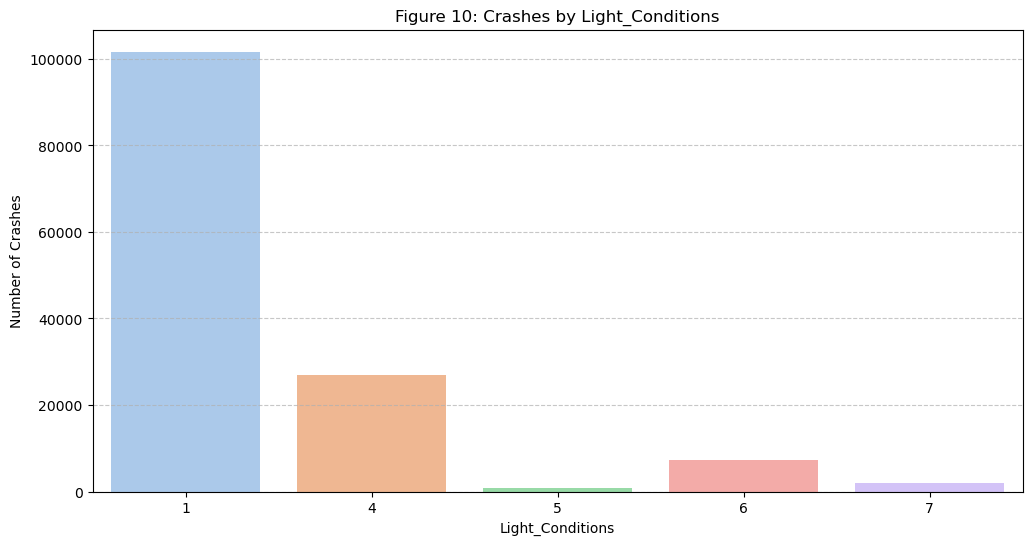

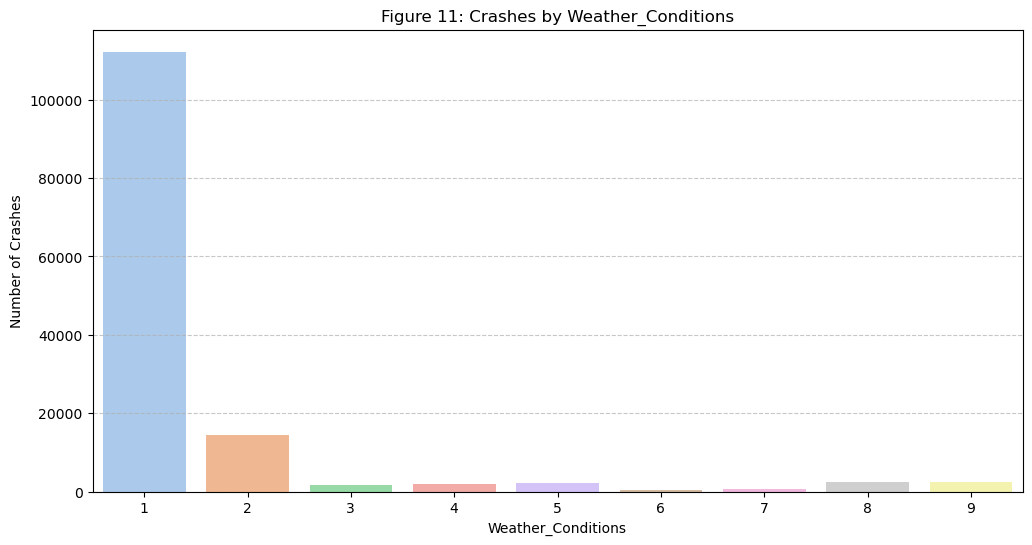

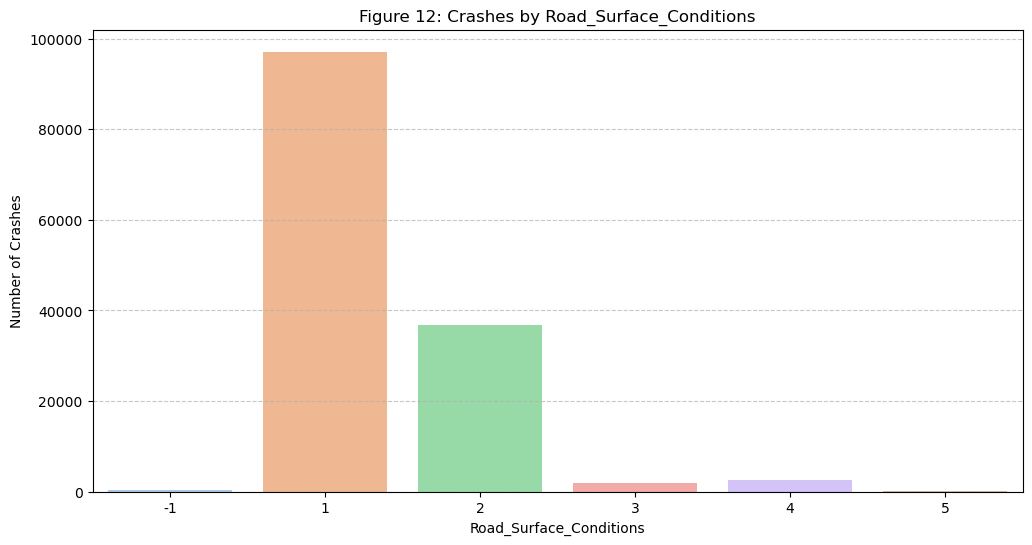

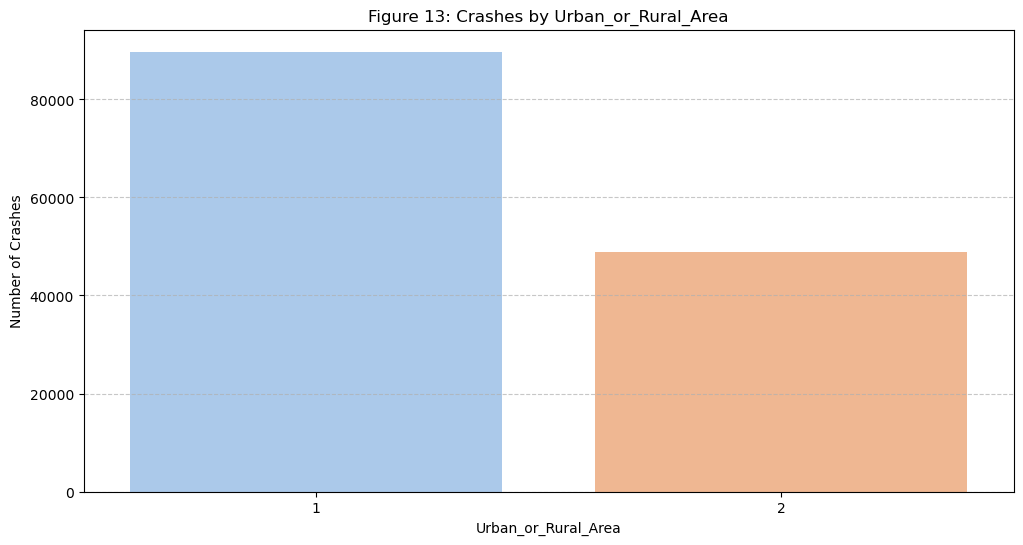

In [29]:
# I want ot have plots of crash distribution for a number of fields of interest but instead of writing ...
# ...code to plot each one we have a function that I can pass the column in as an x axis
def plot_crash_distribution(data, column, title):
    """
    Plot the distribution of crashes for a given column in the dataset.
    
    Parameters:
        data (DataFrame): The DataFrame containing the crash data.
        column (str): The column name for which the distribution is to be plotted.
        title (str): The title for the plot.
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Number of Crashes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_crash_distribution(crash_train, 'Did_Police_Officer_Attend_Scene_of_Accident', 'Figure 5: Police Attendance at Crash Scene')
plot_crash_distribution(crash_train, 'Accident_Severity', 'Figure 6: Crashes by Accident Severity')
plot_crash_distribution(crash_train, 'Number_of_Vehicles', 'Figure 7: Crashes by Number_of_Vehicles')
plot_crash_distribution(crash_train, 'Number_of_Casualties', 'Figure 8: Crashes by Number_of_Casualties')
plot_crash_distribution(crash_train, 'Road_Type', 'Figure 9: Crashes by Road_Type')
plot_crash_distribution(crash_train, 'Light_Conditions', 'Figure 10: Crashes by Light_Conditions')
plot_crash_distribution(crash_train, 'Weather_Conditions', 'Figure 11: Crashes by Weather_Conditions')
plot_crash_distribution(crash_train, 'Road_Surface_Conditions', 'Figure 12: Crashes by Road_Surface_Conditions')
plot_crash_distribution(crash_train, 'Urban_or_Rural_Area', 'Figure 13: Crashes by Urban_or_Rural_Area')

Regarding Figure 5;
* We know from our usecase_guidelines.txt file that "Target variable Did_Police_Officer_Attend_Scene_of_Accident is True when value is equal to 1, False otherwise."
* Meaning that we can see that the majority of accidents were attended by an officer.

Regarding Figure 13;
* Again, we have numerical data and no way to tell definitively which area is rural or urban, we can only make inferences.
* As the title of the column is `Urban_or_Rural_Area` and Urban comes first in the title, 1 might be Urban area. This makes logical sense because population density and therefore traffic is obviously higher in Urban areas.

### 1.4 `LSOA_of_Accident_Location` column data structure
The dtype of the `LSOA_of_Accident_Location` column is string because it contains letters.

I want to have a look at whether or not it is only the first character that is a letter as I suspect, if so then I can remove the fist char of the string and then convert to int dtype which can then be handled by my models.

In [30]:
# Extract the first character of each cell in the 'LSOA_of_Accident_Location' column
first_chars = crash_train['LSOA_of_Accident_Location'].str[0]

# Print the unique first characters
print('Distinct/Unique First Characters: ', first_chars.unique())

print('')

# Extract the first character of each cell in the 'LSOA_of_Accident_Location' column
second_chars = crash_train['LSOA_of_Accident_Location'].str[1]

# Print the unique first characters
print('Distinct/Unique Second Characters: ', second_chars.unique())

Distinct/Unique First Characters:  ['E' nan 'W']

Distinct/Unique Second Characters:  ['0' nan]


### 1.5 `Local_Authority_(Highway)` column data structure
The dtype of the `Local_Authority_(Highway)` column is also string because it contains letters. So we will handle it the same way we did with LSO data if possible.

In [31]:
# Extract the first character of each cell in the 'LSOA_of_Accident_Location' column
first_chars = crash_train['Local_Authority_(Highway)'].str[0]

# Print the unique first characters
print('Distinct/Unique First Characters: ', first_chars.unique())

print('')

# Extract the first character of each cell in the 'LSOA_of_Accident_Location' column
second_chars = crash_train['Local_Authority_(Highway)'].str[1]

# Print the unique first characters
print('Distinct/Unique Second Characters: ', second_chars.unique())

Distinct/Unique First Characters:  ['E' 'W' 'S']

Distinct/Unique Second Characters:  ['0' 'H' '1']


This is a little more complicated than the `LSOA_of_Accident_Location` column because we have values where the second character is a letter. I want to see how many instances of this there and what they are.

In [32]:
# Extract the 'Local_Authority_(Highway)' values where the second character is a letter
filtered_values = crash_train.loc[crash_train['Local_Authority_(Highway)'].str[1].str.isalpha(), 'Local_Authority_(Highway)']

# Print the unique filtered values
print('Distinct/Unique Values where the Second Character is a Letter: ', filtered_values.unique())

# Filter the DataFrame to get rows where the second character in 'Local_Authority_(Highway)' is a letter
filtered_df = crash_train[crash_train['Local_Authority_(Highway)'].str[1].str.isalpha()]

# Count the distinct occurrences of 'Local_Authority_(Highway)' in the filtered DataFrame
distinct_counts = filtered_df['Local_Authority_(Highway)'].nunique()

print('Count of Distinct "Local_Authority_(Highway)" where the Second Character is a Letter:', distinct_counts)

Distinct/Unique Values where the Second Character is a Letter:  ['EHEATHROW']
Count of Distinct "Local_Authority_(Highway)" where the Second Character is a Letter: 1


We have only one cell where the second character is a letter. We will fix this cell later in the preprocessing section.

### 1.6 Correlation Analysis

In [33]:
# Creating a matrix to calculate the correlation between each pair of fields.
crash_train.corr()

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\1767631271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_train.corr()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Year,Month
Location_Easting_OSGR,1.000000,-0.420282,0.999374,-0.422345,-0.374045,0.033469,0.017063,-0.040220,-0.008054,-0.397213,...,0.013890,-0.001680,-0.053086,-0.014288,-0.006694,-0.108112,0.026422,-0.007813,NaN,0.013078
Location_Northing_OSGR,-0.420282,1.000000,-0.430373,0.999973,0.189469,-0.030707,-0.035866,0.028981,0.005211,0.142890,...,-0.000897,0.020411,0.065471,0.011490,0.012769,0.062796,-0.018796,0.004305,NaN,-0.015184
Longitude,0.999374,-0.430373,1.000000,-0.432340,-0.387024,0.033244,0.018052,-0.038888,-0.008067,-0.407033,...,0.013780,-0.001969,-0.053746,-0.014315,-0.007202,-0.106481,0.026831,-0.007819,NaN,0.013277
Latitude,-0.422345,0.999973,-0.432340,1.000000,0.187529,-0.030801,-0.035679,0.029138,0.005216,0.141278,...,-0.000869,0.020244,0.065357,0.011428,0.012669,0.062319,-0.018733,0.004352,NaN,-0.015216
Police_Force,-0.374045,0.189469,-0.387024,0.187529,1.000000,-0.043867,-0.006487,0.017252,0.001023,0.981574,...,0.002583,0.034447,0.081263,0.022893,0.028214,0.253502,-0.002701,-0.015639,NaN,-0.009169
Accident_Severity,0.033469,-0.030707,0.033244,-0.030801,-0.043867,1.000000,0.072698,-0.072313,0.000713,-0.048583,...,-0.048802,0.017712,0.011706,-0.004026,-0.002982,-0.087433,0.100622,-0.004076,NaN,0.000866
Number_of_Vehicles,0.017063,-0.035866,0.018052,-0.035679,-0.006487,0.072698,1.000000,0.247082,0.004919,-0.002728,...,-0.077407,-0.027214,-0.051450,-0.024564,-0.048905,0.037837,-0.041991,0.015417,NaN,0.000950
Number_of_Casualties,-0.040220,0.028981,-0.038888,0.029138,0.017252,-0.072313,0.247082,1.000000,0.005255,0.025310,...,0.024920,-0.007479,0.021235,0.006120,0.000702,0.121518,-0.102043,0.025478,NaN,0.002528
Day_of_Week,-0.008054,0.005211,-0.008067,0.005216,0.001023,0.000713,0.004919,0.005255,1.000000,0.000529,...,0.007908,-0.003753,-0.003714,-0.000097,-0.007497,-0.015593,0.008177,0.036484,NaN,0.016041
Local_Authority_(District),-0.397213,0.142890,-0.407033,0.141278,0.981574,-0.048583,-0.002728,0.025310,0.000529,1.000000,...,0.001665,0.035671,0.082343,0.023653,0.027023,0.267494,0.000104,-0.015755,NaN,-0.007986


The above table is not easy to read so let's create a heat map to visualise it;

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\2329277781.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<Axes: >

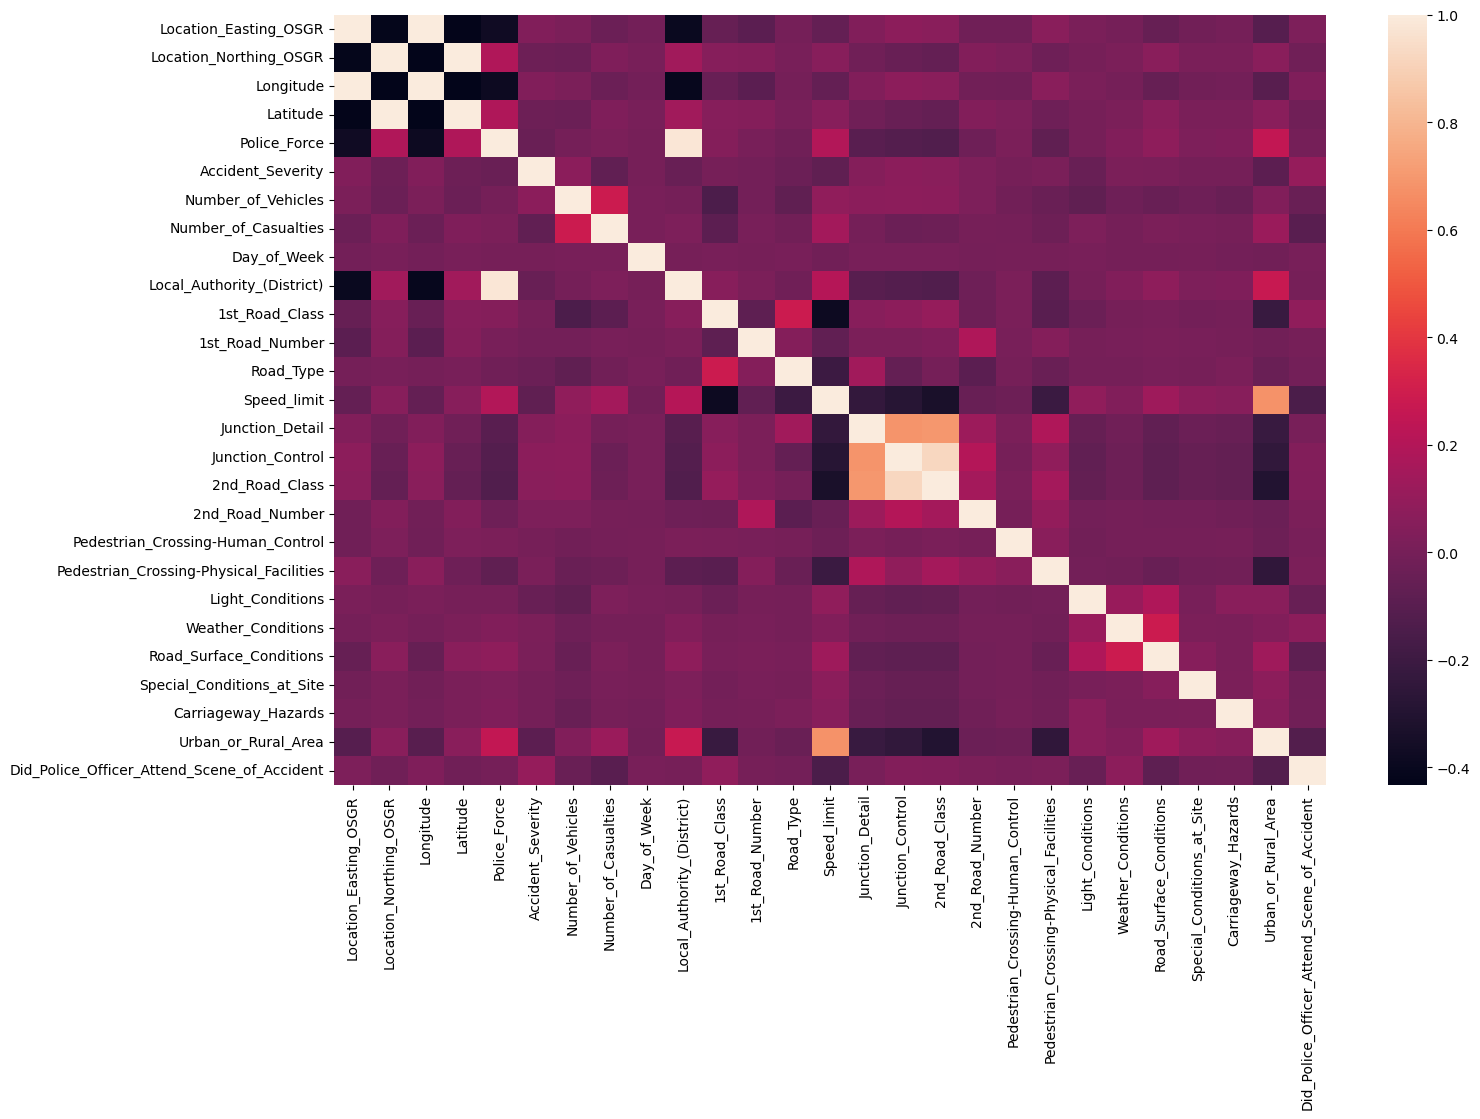

In [34]:
plt.figure(figsize=(16, 10))
sns.heatmap(train_data.corr())

I can see a block of high correlation around Junction_Detail, Junction_Control, 2nd_Road_Class

There is a high Correlation between Police_Force and Local_Authority(District). This suggests along with the name of the column suggests they contain similar or overlapping data.

Below, I look into;
1. The number of `Local_Authority_(District)`s in each `Police_Force`
2. The number of `Local_Authority_(Highway)`s in each `Police_Force`
3. The number of `Local_Authority_(Highway)`s in each `Local_Authority_(District)

To see where the unique values and overlaps are. 

In [35]:
# Group by 'Police_Force' and count distinct 'Local_Authority_(District)'
district_count_by_police_force = crash_train.groupby('Police_Force')['Local_Authority_(District)'].nunique()

# Print the result
print(district_count_by_police_force)

Police_Force
1     33
3      6
4     14
5      5
6     10
7      4
10     6
11     2
12     8
13     5
14     4
16     4
17     4
20     7
21     9
22     9
23     5
30     9
31     8
32     7
33     9
34     7
35     6
36     7
37     7
40     3
41    10
42    14
43    16
44    14
45    11
46    13
47    13
48     1
50    11
52     9
53     6
54     2
55     8
60     6
61     5
62     7
63     4
91     4
92     3
93     3
94     1
95     5
96     3
97    12
98     1
Name: Local_Authority_(District), dtype: int64


In [36]:
# Group by 'Police_Force' and count distinct 'Local_Authority_(Highway)'
district_count_by_police_force = crash_train.groupby('Police_Force')['Local_Authority_(Highway)'].nunique()

# Print the result
print(district_count_by_police_force)

Police_Force
1     33
3      1
4      3
5      5
6     10
7      4
10     6
11     2
12     2
13     5
14     4
16     4
17     4
20     7
21     2
22     4
23     1
30     2
31     2
32     1
33     3
34     1
35     2
36     1
37     1
40     3
41     1
42     3
43     9
44     4
45     1
46     2
47     3
48     1
50     5
52     5
53     1
54     2
55     3
60     6
61     5
62     7
63     4
91     4
92     3
93     3
94     1
95     5
96     3
97    12
98     1
Name: Local_Authority_(Highway), dtype: int64


In [37]:
# Group by 'Local_Authority_(District)' and count distinct 'Police_Force'
district_count_by_police_force = crash_train.groupby('Local_Authority_(District)')['Police_Force'].nunique()

# Print the result
print(district_count_by_police_force)

Local_Authority_(District)
1      1
2      1
3      1
4      1
5      1
      ..
937    1
938    1
939    1
940    1
941    1
Name: Police_Force, Length: 380, dtype: int64


In [38]:
# Group by 'Local_Authority_(District)' and count distinct 'Local_Authority_(Highway)'
district_count_by_police_force = crash_train.groupby('Local_Authority_(District)')['Local_Authority_(Highway)'].nunique()

# Print the result
print(district_count_by_police_force)

Local_Authority_(District)
1      1
2      1
3      1
4      1
5      1
      ..
937    1
938    1
939    1
940    1
941    1
Name: Local_Authority_(Highway), Length: 380, dtype: int64


From lines 43-45 I can see that Local_Authorities (both Highway and District) are subsets of `Police_Force`.

I can also see that for each `Local_Authority_(Highway)` there is a unique `Local_Authority_(District)`.

This makes `Police_Force` redundant and means there is no need to use both Local Authority columns.

This all avoids multicollinearity which can interfere with model stability.

Regarding the block of high correlation around Junction_Detail, Junction_Control, 2nd_Road_Class;
* This is again just numerical data so it's hard to interpret but I would imagine that Junction_Control would be traffic lights, uncontrolled, stop sign etc and road classes are the UK version of motorway, rural R roads and national roads etc. In the context of this dataset these are likely to be important features so they will be likely used but I will investigate not using them later in the model implementation and experimentation section.

## 2. Data Preprocessing 

In [39]:
# Quickly Checking again what my data looks like
crash_train.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Year,Month
0,201301BS70003,527060,177970,-0.171402,51.486361,1,2,2,1,2013-02-01,...,1,1,0,0,1,1,E01002844,9.0,2013,2
1,201301BS70005,526900,178940,-0.173356,51.495115,1,3,1,2,2013-04-01,...,8,1,0,0,1,1,E01002821,8.0,2013,4
2,201301BS70006,524240,181460,-0.210767,51.518353,1,3,1,1,2013-07-01,...,1,1,0,0,1,1,E01002878,11.0,2013,7
3,201301BS70007,524320,181290,-0.209675,51.516808,1,3,2,1,2013-10-01,...,1,1,0,0,1,1,E01002831,10.0,2013,10
4,201301BS70009,525450,178660,-0.194332,51.492922,1,3,2,1,2013-04-01,...,1,1,0,0,1,1,E01002851,17.0,2013,4


**Steps**:

* Convert `Did_Police_Officer_Attend_Scene_of_Accident` to binary because at the moment the current logic is 1= True Else False
* I need to fix the `LSOA_of_Accident_Location` and `Local_Authority_(Highway)` data because they contain letters and I need my data to be numerical.
* Handle the NULL/Missing values
* I don't want to include `Date` or `Time` either. From the `Date` column I created the `Year` and `Month` columns. I think `Date` will be too granular and possibly contain many outliers for it to be reliably used as an indicator so I will use month instead because it solves both problems. Same goes for `Time` and the `Hour` column I created.

Next I'm finding the cell in `Local_Authority_(Highway)` == 'EHEATHROW' and setting it to a random number.

I also check before and after the number of unique values in the column so that my random number isn't already in the column.

In [40]:
# Counting the number of unique values in the column
unique_values_count = crash_train['Local_Authority_(Highway)'].nunique()
print("Number of Unique Values in 'Local_Authority_(Highway)':", unique_values_count)

# Set the value of the cell in 'Local_Authority_(Highway)' where it equals 'EHEATHROW' to 99165
crash_train.loc[crash_train['Local_Authority_(Highway)'] == 'EHEATHROW', 'Local_Authority_(Highway)'] = 99165


# Extract the first character of each cell in the column
second_chars = crash_train['Local_Authority_(Highway)'].str[1]

# Print the unique first characters
print('Distinct/Unique Second Characters: ', second_chars.unique())


unique_values_count = crash_train['Local_Authority_(Highway)'].nunique()
print("Number of Unique Values in 'Local_Authority_(Highway)':", unique_values_count)

Number of Unique Values in 'Local_Authority_(Highway)': 207
Distinct/Unique Second Characters:  ['0' nan '1']
Number of Unique Values in 'Local_Authority_(Highway)': 207


In [41]:
# Fixing the `Local_Authority_(Highway)` column dtype. And calculate the number of unique values

# Set column data = everything after the first character
crash_train['Local_Authority_(Highway)'] = crash_train['Local_Authority_(Highway)'].str[1:]

# Set NULL values = 0 so the line of code after this can be run
crash_train['Local_Authority_(Highway)'].fillna(0, inplace=True)

# Set dtype of the data in the column to ints
crash_train['Local_Authority_(Highway)'] = crash_train['Local_Authority_(Highway)'].astype(int)

In [42]:
crash_train.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Year,Month
0,201301BS70003,527060,177970,-0.171402,51.486361,1,2,2,1,2013-02-01,...,1,1,0,0,1,1,E01002844,9.0,2013,2
1,201301BS70005,526900,178940,-0.173356,51.495115,1,3,1,2,2013-04-01,...,8,1,0,0,1,1,E01002821,8.0,2013,4
2,201301BS70006,524240,181460,-0.210767,51.518353,1,3,1,1,2013-07-01,...,1,1,0,0,1,1,E01002878,11.0,2013,7
3,201301BS70007,524320,181290,-0.209675,51.516808,1,3,2,1,2013-10-01,...,1,1,0,0,1,1,E01002831,10.0,2013,10
4,201301BS70009,525450,178660,-0.194332,51.492922,1,3,2,1,2013-04-01,...,1,1,0,0,1,1,E01002851,17.0,2013,4


In [43]:
# Step 4 : 'Did_Police_Officer_Attend_Scene_of_Accident' contains integer values where 
# 1 means true and anything not equal to 1 is false. I want to convert anything not equal to 1 to 0.
crash_train['Did_Police_Officer_Attend_Scene_of_Accident'] = \
    (crash_train['Did_Police_Officer_Attend_Scene_of_Accident'] == 1).astype(int)

In [44]:
# Check if the column contains only 1s and 0s
print('Values in column are now one of the following: ', set(crash_train['Did_Police_Officer_Attend_Scene_of_Accident']))

Values in column are now one of the following:  {0, 1}


In [45]:
# Checking for NULL Values
null_counts = crash_train.isnull().sum()

print(null_counts)

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              8
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [46]:
# handle missing values in time or time derived data.

"""
# Method 1: Randomly assign values to missing values between 0-24
# Generate random integers between 0 and 24
#generates an array of random integers between 0 and 24, with the same length as the number of 
# missing values in the 'Hour' column.
random_hours = np.random.randint(0, 25, size=crash_train['Hour'].isnull().sum())

# Replace missing values in 'Hour' column with random integers
#selects the missing values in the 'Hour' column, and assigns them the random integers generated.
crash_train.loc[crash_train['Hour'].isnull(), 'Hour'] = random_hours
"""

# Method 2: Exclude rows with missing values in the 'Hour' column
crash_train = crash_train.dropna(subset=['Hour'])

In [47]:
# Fixing the `LSOA_of_Accident_Location` column dtype.

# Set column data = everything after the first character
crash_train['LSOA_of_Accident_Location'] = crash_train['LSOA_of_Accident_Location'].str[1:]

#Method 1 remove missing value rows
crash_train = crash_train.dropna(subset=['LSOA_of_Accident_Location'])

"""
#Method 2 set to 0
# Set NULL values = 0 so the line of code after this can be run
crash_train['LSOA_of_Accident_Location'].fillna(0, inplace=True)

# Set dtype of the data in the column to ints
crash_train['LSOA_of_Accident_Location'] = crash_train['LSOA_of_Accident_Location'].astype(int)
"""

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\1958873339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_train['LSOA_of_Accident_Location'] = crash_train['LSOA_of_Accident_Location'].str[1:]


"\n#Method 2 set to 0\n# Set NULL values = 0 so the line of code after this can be run\ncrash_train['LSOA_of_Accident_Location'].fillna(0, inplace=True)\n\n# Set dtype of the data in the column to ints\ncrash_train['LSOA_of_Accident_Location'] = crash_train['LSOA_of_Accident_Location'].astype(int)\n"

In [48]:
# Checking for NULL Values
null_counts = crash_train.isnull().sum()

print(null_counts)

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [49]:
#  dropping unwanted columns

crash_train = crash_train.drop(columns=['Date', 'Time'])

# Looking at datatypes in our dataset.
crash_train.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                        int32
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
Junction_Control                                 int64
2nd_Road_C

## 3. Model Selection & Experimentation.

I'm going to start by following this (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) guide to find an initial classifier to start with, without any feature engineering or model parameter tuning.

From there I will experiment with other classifier models and compare the accuracy.

### 3.1 Creating our feature and target variables and splitting the data into test and train data.
* `Accident_Index` as it's just a unique identifier for each accident and won't be used by my models.

In [50]:
#Creating our data

# X are our features or predictor variables
X = crash_train.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Index'],  axis = 1)
# Y is our target variable
y = crash_train['Did_Police_Officer_Attend_Scene_of_Accident']

#Splitting My Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 3.2 Checking Police Officer Attendance in entire train_data.csv dataset

Distribution of Police Officer Attendace At Scene of Accident:
1    0.815859
0    0.184141
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64



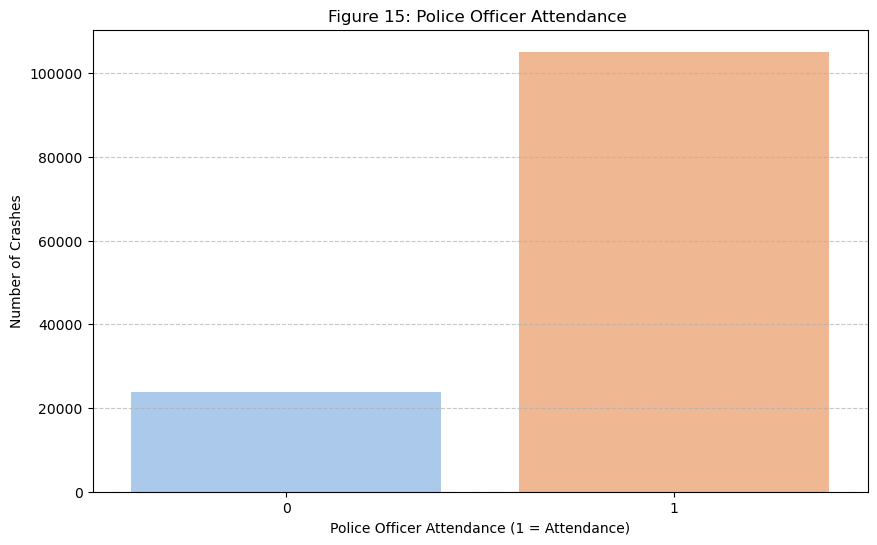

In [39]:
# Plotting the attendance at accidents.
plt.figure(figsize=(10, 6))
sns.countplot(data=crash_train, x='Did_Police_Officer_Attend_Scene_of_Accident', palette='pastel')
plt.title('Figure 15: Police Officer Attendance ')
plt.xlabel('Police Officer Attendance (1 = Attendance)')
plt.ylabel('Number of Crashes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

print('Distribution of Police Officer Attendace At Scene of Accident:')
print(crash_train['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts(normalize=True))
print('')

### 3.2 SGD Classifier

Since we;
* Have >50 samples
* Are initially predicting a category (1 or 0)
* Have labelled data
* More than 100k samples

We are advised to use an SGD Classifier.

In [51]:
# Instantiate my SGD classifier
clf1 = SGDClassifier()
clf1.fit(X_train, y_train)

SGDClassifier()

In [52]:
# Predict on test data
y_pred = clf1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf1.decision_function(X_test))
print("ROC AUC Score:", roc_auc)
print("")

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 81.43 %
Confusion Matrix:
[[    1  4781]
 [    5 20992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      4782
           1       0.81      1.00      0.90     20997

    accuracy                           0.81     25779
   macro avg       0.49      0.50      0.45     25779
weighted avg       0.69      0.81      0.73     25779

ROC AUC Score: 0.533647265575989

Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.0002327475852438031
% of 1s:  0.9997672524147562


Looking at the results of the SGD Classifier, the confusion matrix and the distribution of the predicted values tells us that the model basically correctly predicted all instances of class 1 but failed to predict any of class 0 which shows a large class imbalance. ROC AUC tells us that the model is only slightly better than randomly guessing.

Ensemble techniques like Random Forest classifiers that can handle data with class imbalances might be the way to go.

### 3.3 Model 2: HistGradientBoostingClassifier

In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [54]:
clf2 = HistGradientBoostingClassifier().fit(X_train, y_train)

In [55]:
# Predict on test data
y_pred = clf2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf2.decision_function(X_test))
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 81.97 %
Confusion Matrix:
[[  335  4447]
 [  201 20796]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.07      0.13      4782
           1       0.82      0.99      0.90     20997

    accuracy                           0.82     25779
   macro avg       0.72      0.53      0.51     25779
weighted avg       0.79      0.82      0.76     25779

ROC AUC Score: 0.7405272161821448
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.020792117615113077
% of 1s:  0.9792078823848869


We see the same issues as the first classifier.

### 3.4 Model 3: GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
clf3 = GradientBoostingClassifier().fit(X_train, y_train)

In [724]:
# Predict on test data
y_pred = clf3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf3.decision_function(X_test))
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 82.37 %
Confusion Matrix:
[[  217  4468]
 [   76 21019]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.05      0.09      4685
           1       0.82      1.00      0.90     21095

    accuracy                           0.82     25780
   macro avg       0.78      0.52      0.49     25780
weighted avg       0.81      0.82      0.75     25780

ROC AUC Score: 0.7388492723495353
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.011365399534522886
% of 1s:  0.9886346004654771


Same class imbalance issue here again.

 ### 3.5 Model 4: RandomForestClassifier (RFC)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf4 = RandomForestClassifier()
clf4 = clf4.fit(X, y)

In [60]:
# Predict on test data
y_pred = clf4.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf4.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 100.0 %
Confusion Matrix:
[[ 4782     0]
 [    0 20997]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4782
           1       1.00      1.00      1.00     20997

    accuracy                           1.00     25779
   macro avg       1.00      1.00      1.00     25779
weighted avg       1.00      1.00      1.00     25779

ROC AUC Score: 1.0
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.18549982543931107
% of 1s:  0.8145001745606889


As I suspected before, this model would be able to handle the class imbalances better than the other models. However perfect scores screams overfitting. This indicates a need for potentially over or undersampling and feature engineering, cross validation and paramter tuning. As a first go though this is promising so I will continue with this model going forward and attempt to tune it while comparing the performance of the other models.

## 4. Feature Engineering & Model Parameter Tuning
* Handling multiple locational data types
* Handling multiple police ID codes
* Handling and aggregating temporal data
* Link between `Accident_Severity`, `Number_of_Vehicles` & `Number_of_Casualties`

* I don't need the types of locational data. We have two pinpoint location identifiers; `Location_Easting_OSGR` / `Location_Northing_OSGR` & `Longitude` / `Latitude` and I have one grid (area) type identifier `LSOA_of_Accident_Location`
    * I will remove `Longitude` and `Latitude`
    * It's also important to note that `LSOA_of_Accident_Location` contained almost 10k missing values and I have set them to 0. I will experiment with dropping the rows or not using this feature.
* I don't need `Police_Force` and both `Local_Authority(District)` and `Local_Authority_(Highway)` so I will drop `Police_Force` and `Local_Authority_(Highway)`
* I don't think the 1st and 2nd road numbers will be helpful either. I think a classification of the road type will be a much better feature for the models. thankfully we already have this data in the `1st_Road_Class` and `2nd_Road_Class` columns.

### 4.1 Notes on Model Performance while varying features
I want take notes and store scores etc on each models performance while I am varying the features of the training data. This can be referenced along with the config below it but it doesn't contain all of the results of every feature combination because of time constraints and to avoid creating a massive amount of text.

#### 4.1.1 Original Model Performance From Sections 3;
___
1. *SGD CLassifier*

Accuracy: 81.33 %

Confusion Matrix:

[[    0  4809]

 [    4 20967]]
 
Classification Report:

              precision    recall  f1-score   support
           0       0.00      0.00      0.00      4809
           1       0.81      1.00      0.90     20971
    accuracy                           0.81     25780
    macro avg      0.41      0.50      0.45     25780
    weighted avg   0.66      0.81      0.73     25780

ROC AUC Score: 0.5352018416266633

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.0002
% of 1s:  0.9999
___
2. *HistGradientBoosting Classifier*

Accuracy: 81.84 %

Confusion Matrix:

[[  286  4523]

 [  158 20813]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.06      0.11      4809
           1       0.82      0.99      0.90     20971

    accuracy                           0.82     25780
    macro avg      0.73      0.53      0.50     25780
    weighted avg   0.79      0.82      0.75     25780

ROC AUC Score: 0.740106610700521

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  1.2

% of 1s:  98.3
___
3. *GradientBoosting Classifier*

Accuracy: 81.79 %

Confusion Matrix:

[[  207  4602]

 [   92 20879]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.04      0.08      4809
           1       0.82      1.00      0.90     20971

    accuracy                           0.82     25780
    macro avg      0.76      0.52      0.49     25780
    weighted avg   0.80      0.82      0.75     25780

ROC AUC Score: 0.7299015219097829

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  1.2

% of 1s:  98.9
___
4. *Random Forest Classifier*

Accuracy: 100.0 %

Confusion Matrix:

[[ 4808     1]

 [    0 20971]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4809
           1       1.00      1.00      1.00     20971

    accuracy                           1.00     25780
    macro avg      1.00      1.00      1.00     25780
    weighted avg   1.00      1.00      1.00     25780

ROC AUC Score: 1.0

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  18.7

% of 1s:  81.3
___
#### 4.1.2 Location: OSGR and LSOA Features
While switching between `Latitude`/`Longitdue` `Location_Easting_OSGR`/`Location_Northing_OSGR` and `LSOA_of_Accident_Location` I will assess the performance of the models.
___
1. *SGD CLassifier*
Accuracy: 21.7 %

Confusion Matrix:

[[ 4599   146]

 [20039   996]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.97      0.31      4745
           1       0.87      0.05      0.09     21035

    accuracy                           0.22     25780
    macro avg      0.53      0.51      0.20     25780
    weighted avg   0.75      0.22      0.13     25780

ROC AUC Score: 0.5230316976347564

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.9557020946470132

% of 1s:  0.04429790535298681

___
2. *HistGradientBoosting Classifier*

Accuracy: 82.04 %

Confusion Matrix:

[[  261  4484]

 [  145 20890]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.06      0.10      4745
           1       0.82      0.99      0.90     21035

    accuracy                           0.82     25780
    macro avg      0.73      0.52      0.50     25780
    weighted avg   0.79      0.82      0.75     25780

ROC AUC Score: 0.7392227766307496

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.01574864235841738

% of 1s:  0.9842513576415827

___
3. *GradientBoosting Classifier*

Accuracy: 82.04 %

Confusion Matrix:
[[  185  4560]
 [   71 20964]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.04      0.07      4745
           1       0.82      1.00      0.90     21035

    accuracy                           0.82     25780
    macro avg      0.77      0.52      0.49     25780
    weighted avg   0.80      0.82      0.75     25780

ROC AUC Score: 0.7283139471246052

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.009930178432893715

% of 1s:  0.9900698215671063
___
4. *Random Forest Classifier*

Accuracy: 100.0 %

Confusion Matrix:

[[ 4744     1]

 [    0 21035]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4745
           1       1.00      1.00      1.00     21035

    accuracy                           1.00     25780
    macro avg      1.00      1.00      1.00     25780
    weighted avg   1.00      1.00      1.00     25780

ROC AUC Score: 1.0

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.18401861908456169

% of 1s:  0.8159813809154384
___

#### 4.1.3 Location: Lat/Long and LSOA Features
Only interested in the two highest performing models this time.
___
2. *HistGradientBoosting Classifier*

Accuracy: 82.29 %

Confusion Matrix:

[[  295  4408]

 [  157 20920]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.06      0.11      4703
           1       0.83      0.99      0.90     21077

    accuracy                           0.82     25780
    macro avg      0.74      0.53      0.51     25780
    weighted avg   0.79      0.82      0.76     25780

ROC AUC Score: 0.7408200953600756

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.017532971295577966

% of 1s:  0.982467028704422

___
4. *Random Forest Classifier*

Accuracy: 100.0 %

Confusion Matrix:

[[ 4703     0]

 [    0 21077]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4703
           1       1.00      1.00      1.00     21077

    accuracy                           1.00     25780
    macro avg      1.00      1.00      1.00     25780
    weighted avg   1.00      1.00      1.00     25780

ROC AUC Score: 1.0

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.18242823894491855

% of 1s:  0.8175717610550814

___

#### 4.1.4 Location: LSOA Features only
Only interested in the two highest performing models this time.
___
2. *HistGradientBoosting Classifier*

Accuracy: 81.1 %

Confusion Matrix:

[[   17  4820]

 [   52 20891]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.00      0.01      4837
           1       0.81      1.00      0.90     20943

    accuracy                           0.81     25780
    macro avg      0.53      0.50      0.45     25780
    weighted avg   0.71      0.81      0.73     25780

ROC AUC Score: 0.5386460770771421

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.0026764934057408843

% of 1s:  0.9973235065942592

___
4. *Random Forest Classifier*

Accuracy: 100.0 %

Confusion Matrix:

[[ 4836     1]

 [    0 20943]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4837
           1       1.00      1.00      1.00     20943

    accuracy                           1.00     25780
    macro avg      1.00      1.00      1.00     25780
    weighted avg   1.00      1.00      1.00     25780

ROC AUC Score: 1.0

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.18758727695888286

% of 1s:  0.8124127230411171

___
#### 4.1.4 Location: Lat/Long Features only
Only interested in the two highest performing models
___
2. *HistGradientBoosting Classifier*

Accuracy: 82.29 %

Confusion Matrix:

[[  304  4415]

 [  150 20911]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.06      0.12      4719
           1       0.83      0.99      0.90     21061

    accuracy                           0.82     25780
    macro avg      0.75      0.53      0.51     25780
    weighted avg   0.80      0.82      0.76     25780

ROC AUC Score: 0.744270693774516

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.01761055081458495

% of 1s:  0.982389449185415

___
4. *Random Forest Classifier*

Accuracy: 100.0 %

Confusion Matrix:

[[ 4719     0]

 [    0 21061]]
 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4719
           1       1.00      1.00      1.00     21061

    accuracy                           1.00     25780
    macro avg      1.00      1.00      1.00     25780
    weighted avg   1.00      1.00      1.00     25780

ROC AUC Score: 1.0

Distribution of predicted values (1s and 0s) in y_pred:

% of 0s:  0.1830488750969744

% of 1s:  0.8169511249030256

___



In [61]:
# Date & Time has already been dropped

# 1. Excluding Latitude/Longitude and using OSGR and LSOA 
"""crash_train = crash_train.drop(columns=['Year', 'Latitude', 'Longitude', 'Police_Force', \
                                        'Local_Authority_(Highway)'])"""

# 2. Excluding OSGR and using LSOA and Lat/Long (2>1)
"""crash_train = crash_train.drop(columns=['Year', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', \
                                        'Local_Authority_(Highway)'])
"""

# 3. Excluding OSGR and lat/long and using LSOA only (2>1>3)
"""crash_train = crash_train.drop(columns=['Year','Latitude', 'Longitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', \
                                        'Police_Force','Local_Authority_(Highway)'])"""

# 4. lat/long only (4>2>1>3)
crash_train = crash_train.drop(columns=['Year', 'Location_Easting_OSGR', 'Location_Northing_OSGR', \
                                        'LSOA_of_Accident_Location','Police_Force', 'Local_Authority_(Highway)'])

# 5. OSGR data only (4>5>2>1>3)
"""crash_train = crash_train.drop(columns=['Year',  \
                                        'LSOA_of_Accident_Location', 'Latitude', 'Longitude', \
                                        'Police_Force', 'Local_Authority_(Highway)'])
"""

# 6. config 4 + Excluding road numbers (4>6)
"""crash_train = crash_train.drop(columns=['1st_Road_Number', '2nd_Road_Number', 'Year', 'Latitude', 'Longitude', \
                                        'Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location', \
                                        'Police_Force', 'Local_Authority_(Highway)'])"""


crash_train.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201301BS70003,-0.171402,51.486361,2,2,1,4,12,3,3217,...,0,1,1,1,0,0,1,1,9.0,2
1,201301BS70005,-0.173356,51.495115,3,1,2,6,12,3,3218,...,5,1,8,1,0,0,1,1,8.0,4
2,201301BS70006,-0.210767,51.518353,3,1,1,2,12,4,450,...,1,1,1,1,0,0,1,1,11.0,7
3,201301BS70007,-0.209675,51.516808,3,2,1,5,12,4,450,...,5,1,1,1,0,0,1,1,10.0,10
4,201301BS70009,-0.194332,51.492922,3,2,1,6,12,3,3220,...,0,4,1,1,0,0,1,1,17.0,4


In [62]:
#Creating our data after feature tuning

# X are our features or predictor variables
X = crash_train.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Index'],  axis = 1)
# Y is our target variable
y = crash_train['Did_Police_Officer_Attend_Scene_of_Accident']

#Splitting My Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 4.2 SGDClassifier v2

Running first classifier again.

In [871]:
# Instantiate my SGD classifier
clf1 = SGDClassifier()
clf1.fit(X_train, y_train)

SGDClassifier()

In [872]:
# Predict on test data
y_pred = clf1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf1.decision_function(X_test))
print("ROC AUC Score:", roc_auc)
print("")

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 80.9 %
Confusion Matrix:
[[  103  4612]
 [  313 20752]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.02      0.04      4715
           1       0.82      0.99      0.89     21065

    accuracy                           0.81     25780
   macro avg       0.53      0.50      0.47     25780
weighted avg       0.71      0.81      0.74     25780

ROC AUC Score: 0.5197483323722287

Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.016136539953452288
% of 1s:  0.9838634600465477


Seeing a slight improvement but not very promising.

### 4.3 HistGradientBoostingClassifier v2

In [873]:
clf2 = HistGradientBoostingClassifier().fit(X_train, y_train)

In [874]:
# Predict on test data
y_pred = clf2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf2.decision_function(X_test))
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 82.29 %
Confusion Matrix:
[[  299  4416]
 [  149 20916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.06      0.12      4715
           1       0.83      0.99      0.90     21065

    accuracy                           0.82     25780
   macro avg       0.75      0.53      0.51     25780
weighted avg       0.80      0.82      0.76     25780

ROC AUC Score: 0.7395303029883517
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.017377812257564004
% of 1s:  0.982622187742436


Again, seeing a marginal improvement in the ability to correctly classify 0s but a small decrease in ROC AUC score.

### 4.4 GradientBoostingClassifier v2

In [875]:
clf3 = GradientBoostingClassifier().fit(X_train, y_train)

In [876]:
# Predict on test data
y_pred = clf3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf3.decision_function(X_test))
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 82.24 %
Confusion Matrix:
[[  209  4506]
 [   72 20993]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.04      0.08      4715
           1       0.82      1.00      0.90     21065

    accuracy                           0.82     25780
   macro avg       0.78      0.52      0.49     25780
weighted avg       0.81      0.82      0.75     25780

ROC AUC Score: 0.7287509826047187
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.010899922420480993
% of 1s:  0.989100077579519


### 4.5 RandomForestClassifier v2

In [63]:
clf4 = RandomForestClassifier(n_estimators=20)
clf4 = clf4.fit(X, y)

In [64]:
# Predict on test data
y_pred = clf4.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", np.round(accuracy * 100, 2), "%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, clf4.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Get the distribution of predicted values (1s and 0s) in y_pred
distribution_y_pred = np.bincount(y_pred)

# Print the distribution
print("Distribution of predicted values (1s and 0s) in y_pred:")

print('% of 0s: ', distribution_y_pred[0] / (distribution_y_pred[0] + distribution_y_pred[1]))
print('% of 1s: ', distribution_y_pred[1] / (distribution_y_pred[0] + distribution_y_pred[1]))

Accuracy: 99.71 %
Confusion Matrix:
[[ 4707    70]
 [    5 20997]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4777
           1       1.00      1.00      1.00     21002

    accuracy                           1.00     25779
   macro avg       1.00      0.99      1.00     25779
weighted avg       1.00      1.00      1.00     25779

ROC AUC Score: 0.999977039976874
Distribution of predicted values (1s and 0s) in y_pred:
% of 0s:  0.18278443694480004
% of 1s:  0.8172155630551999


#### Overfitting
Extremely good performance but I think it's pretty evident at this stage that my model is overfitting so we will check CV scores and then move to class balancing.

### 4.6 K-Fold Cross Validtion Scores

Carrying out Cross validation on both the HistGradientBoostingClassifier and the RandomForestClassifier using sklearn's cross_val_score where we get cross validation scores for each fold of the training data. Then we use numpy to cacl a mean across the scores. This gives us an idea of the models stability and ability to generalise.

In [65]:
# Perform cross-validation
cv_scores = cross_val_score(clf2, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.81244424 0.65561116 0.74060282 0.8223748  0.37842346]
Mean CV Accuracy: 0.6818912946465098


In [66]:
# Perform cross-validation
cv_scores = cross_val_score(clf4, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.79037201 0.67442492 0.72884906 0.80988401 0.35790209]
Mean CV Accuracy: 0.6722864184187676


### 4.7 Class Balancing

In [42]:
class_distribution = crash_train['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1    105161
0     23735
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64


As can be seen from the above, there is a clear class imbalance. There are far more instances where an officer attends than not. In the context of my data, it is probably more likely police will attend the scene of an accident than not, so in practice this data makes sense.

However, it's still important to assess the impact of class imbalance on model performance and consider whether any potential biases are present. 

I will try using the balanced class_weight parameter in the RandomForestClassifier.

Then I will try under and oversampling and check the CV scores of each.

In [67]:
# Initialize RandomForestClassifier with balanced class weights
clf_balanced = RandomForestClassifier(n_estimators=50, class_weight='balanced')

# Fit the model on the training data
clf_balanced.fit(X_train, y_train)

# Predict on the test data
y_pred_balanced = clf_balanced.predict(X_test)

# Calculate accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print("Accuracy with Balanced Class Weights:", np.round(accuracy_balanced * 100, 2), "%")

# Confusion matrix
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Confusion Matrix with Balanced Class Weights:")
print(conf_matrix_balanced)

# Classification report
print("Classification Report with Balanced Class Weights:")
print(classification_report(y_test, y_pred_balanced))

# ROC AUC score
roc_auc_balanced = roc_auc_score(y_test, clf_balanced.predict_proba(X_test)[:, 1])
print("ROC AUC Score with Balanced Class Weights:", roc_auc_balanced)

Accuracy with Balanced Class Weights: 81.51 %
Confusion Matrix with Balanced Class Weights:
[[  465  4312]
 [  454 20548]]
Classification Report with Balanced Class Weights:
              precision    recall  f1-score   support

           0       0.51      0.10      0.16      4777
           1       0.83      0.98      0.90     21002

    accuracy                           0.82     25779
   macro avg       0.67      0.54      0.53     25779
weighted avg       0.77      0.82      0.76     25779

ROC AUC Score with Balanced Class Weights: 0.7067883045200578


This seems like a much more realistic performance of the classifier model and might indicate that we have mitigated the overfitting issue.

In [68]:
# Perform cross-validation
cv_scores = cross_val_score(clf_balanced, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.81391831 0.69971682 0.75064975 0.81783622 0.65645124]
Mean CV Accuracy: 0.7477144687632374


**Over and Undersampling**: We use imblearn which has built in functions for handling over and undersampling in a dataset. We use it to adjust our train data, retrain a model and assess the performance.

In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomOverSampler and RandomUnderSampler
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Resample the datasets
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier with balanced class weights
clf_balanced_oversampled = RandomForestClassifier(n_estimators=20, class_weight='balanced')
clf_balanced_undersampled = RandomForestClassifier(n_estimators=20, class_weight='balanced')

# Fit the models on the resampled training data
clf_balanced_oversampled.fit(X_train_oversampled, y_train_oversampled)
clf_balanced_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Predict on the test data
y_pred_balanced_oversampled = clf_balanced_oversampled.predict(X_test)
y_pred_balanced_undersampled = clf_balanced_undersampled.predict(X_test)

# Calculate accuracy
accuracy_balanced_oversampled = accuracy_score(y_test, y_pred_balanced_oversampled)
accuracy_balanced_undersampled = accuracy_score(y_test, y_pred_balanced_undersampled)

print("Accuracy with Random Oversampling:", np.round(accuracy_balanced_oversampled * 100, 2), "%")
print("Accuracy with Random Undersampling:", np.round(accuracy_balanced_undersampled * 100, 2), "%")


Accuracy with Random Oversampling: 78.41 %
Accuracy with Random Undersampling: 60.75 %


In [70]:
# Perform cross-validation
cv_scores = cross_val_score(clf_balanced_oversampled, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.81166841 0.68683812 0.74211568 0.8148105  0.55659865]
Mean CV Accuracy: 0.7224062733127741


In [71]:
# Perform cross-validation
cv_scores = cross_val_score(clf_balanced_undersampled, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.81225028 0.68901043 0.74704217 0.81469413 0.583676  ]
Mean CV Accuracy: 0.729334603173147


### 4.8 Random Search Cross Validation Hyper Parameter Tuning of Random Forest Classifier


In [937]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(10, 100),  # Randomly sample from range [100, 1000)
    'max_depth': [None] + list(range(10, 31)),  # Include None and values from 10 to 30
    'min_samples_split': randint(2, 11),  # Randomly sample from range [2, 10)
    'min_samples_leaf': randint(1, 11),  # Randomly sample from range [1, 10)
    'max_features': ['sqrt', 'log2', None],  
    'class_weight': ['balanced'],
}

# Instantiate the RandomForestClassifier
clf5 = RandomForestClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=clf5, param_distributions=param_dist, n_iter=5, cv=3)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model
accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 59}
Best Model Accuracy: 0.7711404189294027


The issue with doing this is the time it takes. The higher the n_estimators the more accurate the model will likely be but the longer it takes the model to train and with only 5 iterations it's not a great number of parameter combinations however due to time constraints running this on my pc this is what I have to work with.

An alternative is to use google colab which allows you to use their compute power. I ran this in google collab too but it wasn't significantly quicker since I am stuck with the free options for harware acceleration.

Below we train a final tuned model taking into account the findings in this section. I have also chosen to have a higher n_estimators to increase the model performance and to not use the under or oversampled datasets because they both reduce the performance of the model.

In [76]:
# Initialize RandomForestClassifier with balanced class weights
clf_tuned = RandomForestClassifier(class_weight = 'balanced', max_depth = None, max_features = None, \
                                    min_samples_leaf = 7, min_samples_split = 5, n_estimators = 200)

# Fit the model on the training data
clf_tuned.fit(X_train, y_train)

# Predict on the test data
y_pred_tuned = clf_tuned.predict(X_test)

# Calculate accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy with Balanced Class Weights:", np.round(accuracy_tuned * 100, 2), "%")

# Confusion matrix
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix with Balanced Class Weights:")
print(conf_matrix_tuned)

# Classification report
print("Classification Report with Balanced Class Weights:")
print(classification_report(y_test, y_pred_tuned))

# ROC AUC score
roc_auc_tuned = roc_auc_score(y_test, clf_tuned.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_tuned)

Accuracy with Balanced Class Weights: 77.47 %
Confusion Matrix with Balanced Class Weights:
[[ 1766  3011]
 [ 2798 18204]]
Classification Report with Balanced Class Weights:
              precision    recall  f1-score   support

           0       0.39      0.37      0.38      4777
           1       0.86      0.87      0.86     21002

    accuracy                           0.77     25779
   macro avg       0.62      0.62      0.62     25779
weighted avg       0.77      0.77      0.77     25779

ROC AUC Score: 0.7238564727340281


## 5. Running Final Model on Test Data

In [77]:
test_data = pd.read_csv('C:/Users/Dillon/Documents/Work (FB)/Vodafone/Task/test_data.csv')

# Step 1: Convert 'Date' column to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Extract hour from the 'Time' column
test_data['Hour'] = pd.to_datetime(test_data['Time']).dt.hour

# Extract year and month from the 'Date' column
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] = test_data['Date'].dt.month


# Steps 2 & 3: Dropping unwanted columns
test_data = test_data.drop(columns=['LSOA_of_Accident_Location','Date', 'Time', 'Year', \
                                      'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', \
                                      'Local_Authority_(Highway)'])


null_counts = test_data.isnull().sum()

print(null_counts)


Accident_Index                                     0
Longitude                                          0
Latitude                                           0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Day_of_Week                                        0
Local_Authority_(District)                         0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                                    0
Junction_Control                                   0
2nd_Road_Class                                     0
2nd_Road_Number                                    0
Pedestrian_Crossing-Human_Control                  0
Pedestrian_Crossing-Physical_Facilities            0
Light_Conditions                              

C:\Users\Dillon\AppData\Local\Temp\ipykernel_8324\1211961320.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data['Date'] = pd.to_datetime(test_data['Date'])


In [78]:
#Splitting My Data
X_testX = test_data.drop(['Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Index'], axis = 1)
y_testX = test_data['Did_Police_Officer_Attend_Scene_of_Accident']


# Predict on test data
y_predX = clf_tuned.predict(X_testX)

Creating a df of the predicted values to export

In [79]:
# Create a DataFrame with 'Accident_Index' and predictions
predictions_df = pd.DataFrame({'Accident_Index': test_data['Accident_Index'], 'Predictions': y_predX})

In [80]:
predictions_df.head()
predictions_df.to_csv('C:/Users/Dillon/Documents/Work (FB)/Vodafone/Task/predictions_final.csv')

### 5.1 Comparing Target Variable Distribution vs Actual Data 

In [81]:
class_distribution = crash_train['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()
print("Class Distribution:")
print(class_distribution)
print('')
T_variable_dist = predictions_df['Predictions'].value_counts()
print("arget Variable Distribution:")
print(T_variable_dist)

Class Distribution:
1    105159
0     23735
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

arget Variable Distribution:
1    9583
0    2720
Name: Predictions, dtype: int64


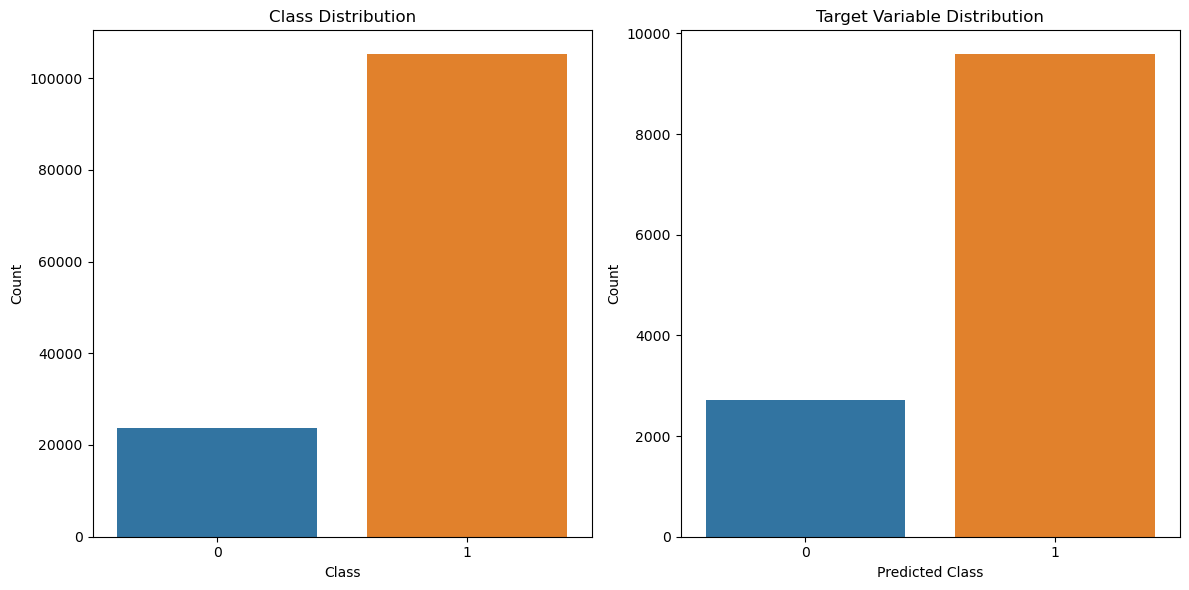

In [82]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot class distribution
sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot target variable distribution
sns.barplot(x=T_variable_dist.index, y=T_variable_dist.values, ax=axes[1])
axes[1].set_title('Target Variable Distribution')
axes[1].set_xlabel('Predicted Class')
axes[1].set_ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()

The distrubtion of the target variable and our class look similar. This can be a good or a bad thing because the distribution of the target variable in reality may or may not look like the class distribution. The model was trained on an entire year of data

## 6. Time & Compute Constraints Discussion

* I would run my Random Search CV Hyperparameter Tuning again with more iterations and parameter variation in order to a get better combination of best fit parameters.
* I would experiment with more class balancing methods like Synthetic Minority Over-sampling Technique (SMOTE). 
* I would also like ot experiment with using XGBoost and some DLNNs
* I would also consider training a model on the same month I'm running a prediction on or somehow assiging weights to each month if there was sufficient data in each month.
* I would also like more years of data, then dates, weeks and months would likely be utilised better by a model which would be able to make better inferences about the relationship between larger periods of time and the probability of an officer to attend an accident.

## 7. Discussion of Model Deployment
Here are some steps to consider when deploying a model like this;
1. Implement or use version control systems like git or VS Code to keep track or iterations of the model and the ability to revert to older versions etc.
2. Create a pipeline to ingest new raw data to transform it into a format that the model can accept.
3. Run data quality and completeness checks (potentially in the pipeline) to ensure that we can handle missing values, incorrectly formatted data and any other issues with the dataset.
4. Create a way to assess the performance of the model over time, assessing metrics like the ones we have use during this project;
    * Accuracy, precision, recall, f1-scores, ROC AUC etc
5. Create and provide documentation for other users to improve upskilling, readability and usability.
6. Implement some kind of API or config in the code to make running future predictions quicker and easier for me or end users. e.g. 
    * "Select Input Data: _____"
    * "Assign Weights to a feature?:___"
    * "Month/Day/Week to Predict:___"